In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("dataframe/all_results.csv")
df.head()

,model,quantile,param,summary_statistic,Cramer-von Mises Distance,Energy Distance,Kullback-Leibler Divergence,Maximum Mean Discrepancy,Wasserstein Distance
0,n0.5_no_smoothing,5%,a,Mean,6.504997,1.331734,1.407234,2.496294,0.026346
1,n0.5_no_smoothing,5%,a,Median,7.072104,1.374872,1.383442,2.563425,-0.094252
2,n0.5_no_smoothing,5%,a,Lower Bound,0.588744,0.144668,-0.667054,0.595166,-0.748066
3,n0.5_no_smoothing,5%,a,Upper Bound,9.631208,2.708241,3.994846,4.510399,1.183190
4,n0.5_no_smoothing,5%,b,Mean,-5.824737,3.860598,3.513054,2.223665,0.000376


In [6]:
median = df[df["summary_statistic"] == "Median"]
median.head(6)

,model,quantile,param,summary_statistic,Cramer-von Mises Distance,Energy Distance,Kullback-Leibler Divergence,Maximum Mean Discrepancy,Wasserstein Distance
1,n0.5_no_smoothing,5%,a,Median,7.072104,1.374872,1.383442,2.563425,-0.094252
5,n0.5_no_smoothing,5%,b,Median,-6.453199,3.605502,3.530899,2.062306,1.839642
9,n0.5_no_smoothing,1%,a,Median,6.971108,1.170533,1.744959,1.944111,0.297984
13,n0.5_no_smoothing,1%,b,Median,-6.649895,1.623943,1.929465,0.989888,1.899594
17,n0.5_no_smoothing,0.1%,a,Median,0.367635,0.587111,0.834088,0.587111,0.619858
21,n0.5_no_smoothing,0.1%,b,Median,1.750229,0.580008,4.990938,0.580008,2.257580


In [9]:
alpha = median[median["param"] == "a"][["model", "quantile", "Wasserstein Distance"]].reset_index()
beta = median[median["param"] == "b"][["model", "quantile", "Wasserstein Distance"]].reset_index()

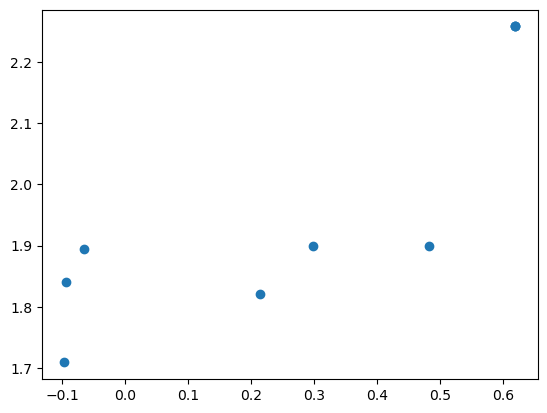

In [10]:
plt.scatter(alpha["Wasserstein Distance"], beta["Wasserstein Distance"])
plt.show()